In [5]:
# system & general:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import cPickle as pickle
import os
import re
import time

# data analysis and statistics:
import pandas as pd
import numpy as np
from scipy import stats
import random
from scipy.stats import pearsonr,fisher_exact,mannwhitneyu
import math
from scipy.spatial.distance import braycurtis, pdist, euclidean

# figures:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns 
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec
# from PNPChip.ForPaper.Figures.nature_guidline_utils import m2inch
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

#my functions:
from ShaniBA.myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot, adjusted_roundup
from ShaniBA.MyFunctionsShani import *
from ShaniBA.GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from ShaniBA.TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from ShaniBA.TCR_microbiome_interactions.TCR_microbiome_interactions_functions2 import *
from ShaniBA.SampleLists.SampleFileFunctions import *
from ShaniBA.PhenotypicData.PhenotypeGenerationFunctions import *
from ShaniBA.CardioProject.CardioFunctions import *
from ShaniBA.PredictionPipeline.PredictionFunctions import *
from ShaniBA.TCR_feature_generation.SubsamplingFunctions import *
from ShaniBA.CardioProject.Figures.GeneralFigureFunctions import *


stop
done1
stop
done
done
stop
end of function!!!


/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [6]:
print 'age data'
Age=pd.read_excel('%s/TCR_real_data/PNP530Cardio126Combined/Phenotypes/\
PNP530Cardio126_Age.xlsx' %MyPath).set_index('BD')
print Age.shape
print Age.head()

print 'gender data'
Gender=pd.read_excel('%s/TCR_real_data/PNP530Cardio126Combined/Phenotypes/\
PNP530Cardio126_Gender_Male.xlsx' %MyPath).set_index('BD')
print Gender.shape
print Gender.head()

print 'isCardio data'
isCardio=pd.read_pickle(PRED_RESULTS_DIR+'TargetDFs/isCardio.dat')

print 'merging all'
AgeGender=pd.merge(Age,Gender,how='inner',left_index=True,right_index=True).dropna()
AgeGenderIsCardio=pd.merge(AgeGender,isCardio,how='inner',left_index=True,right_index=True).dropna()
print AgeGenderIsCardio.shape
print AgeGenderIsCardio.head()


age data
(656, 1)
        Age
BD         
BD406  65.0
BD228  32.0
BD714  39.0
BD808  26.0
BD144  36.0
gender data
(656, 1)
       Gender_Male
BD                
BD406            0
BD228            1
BD714            1
BD808            0
BD144            0
isCardio data
merging all
(652, 3)
        Age  Gender_Male  isCardio
BD406  65.0            0         0
BD228  32.0            1         0
BD714  39.0            1         0
BD808  26.0            0         0
BD144  36.0            0         0


In [7]:
X=AgeGenderIsCardio[['Age','Gender_Male']]
y=AgeGenderIsCardio['isCardio']

/usr/wisdom/python/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


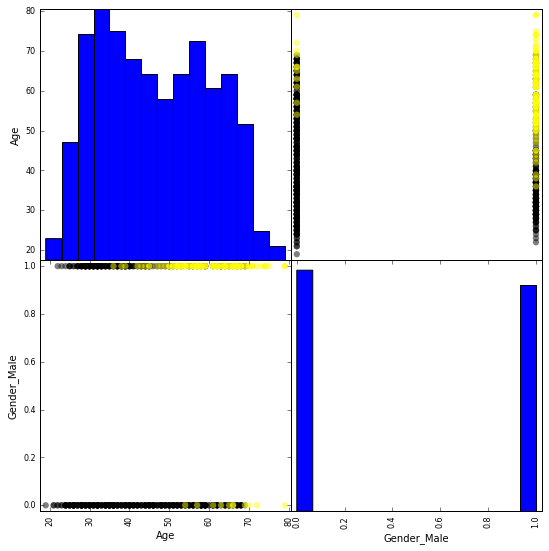

In [8]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c= y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)
plt.show()
